<a href="https://colab.research.google.com/github/ads-22/Pothole-Detection/blob/main/training/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [ ]:
imagepaths = []
import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/dataset_45M_CNN/'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

print(len(imagepaths))


2123


In [ ]:
IMG_SIZE=128
count=0
count_pothole=0
x=[]
y=[]
for image in imagepaths:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        # x.append(np.array(img))
        if(image.startswith('/content/gdrive/MyDrive/dataset_45M_CNN/normal/')):
            y.append('NORMAL')
            count=count+1
        else:

            if(count_pothole>500):
                continue

            y.append('POTHOLES')
            count_pothole=count_pothole+1
        x.append(np.array(img))

    except:
        pass

In [ ]:
print(len(x))
print(y)
print(count)

1204
['NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NOR

In [ ]:
from sklearn.utils import shuffle
x,y = shuffle(x, y, random_state=5)

In [ ]:
print(y)

['POTHOLES', 'NORMAL', 'POTHOLES', 'NORMAL', 'NORMAL', 'POTHOLES', 'NORMAL', 'POTHOLES', 'POTHOLES', 'POTHOLES', 'NORMAL', 'POTHOLES', 'POTHOLES', 'POTHOLES', 'NORMAL', 'POTHOLES', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'POTHOLES', 'POTHOLES', 'NORMAL', 'POTHOLES', 'NORMAL', 'NORMAL', 'POTHOLES', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'POTHOLES', 'POTHOLES', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'POTHOLES', 'NORMAL', 'POTHOLES', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'POTHOLES', 'NORMAL', 'NORMAL', 'POTHOLES', 'POTHOLES', 'NORMAL', 'POTHOLES', 'NORMAL', 'NORMAL', 'NORMAL', 'POTHOLES', 'POTHOLES', 'POTHOLES', 'NORMAL', 'POTHOLES', 'POTHOLES', 'POTHOLES', 'NORMAL', 'NORMAL', 'POTHOLES', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'POTHOLES', 'NORMAL', 'POTHOLES', 'NORMAL', 'NORMAL', 'POTHOLES', 'POTHOLES', 'NORMAL', 'POTHOLES', 'NORMAL', 'NORMAL', 'NORMAL', 'POTHOLES', 'NORMAL', 'POTHOLES', 'POTHOLES', 'POTHOLES', 'POTHOLES', 'NORMAL', '

/content/gdrive/MyDrive/dataset_45M_CNN/normal/186.jpg
/content/gdrive/MyDrive/dataset_45M_CNN/pothole/po_2106_jpg.rf.58b56fc07e7e9315448a2c562eba9842.jpg
/content/gdrive/MyDrive/dataset_45M_CNN/normal/152.jpg
/content/gdrive/MyDrive/dataset_45M_CNN/pothole/po_3011_jpg.rf.358945581a26f4272ce93d0566c78971.jpg
/content/gdrive/MyDrive/dataset_45M_CNN/pothole/po_361_jpg.rf.583822252fd4d539c5b975e7fd430a8e.jpg
/content/gdrive/MyDrive/dataset_45M_CNN/normal/76.jpg
/content/gdrive/MyDrive/dataset_45M_CNN/normal/G0485858.JPG
/content/gdrive/MyDrive/dataset_45M_CNN/normal/206.jpg
/content/gdrive/MyDrive/dataset_45M_CNN/normal/G0485838.JPG
/content/gdrive/MyDrive/dataset_45M_CNN/normal/32.jpg


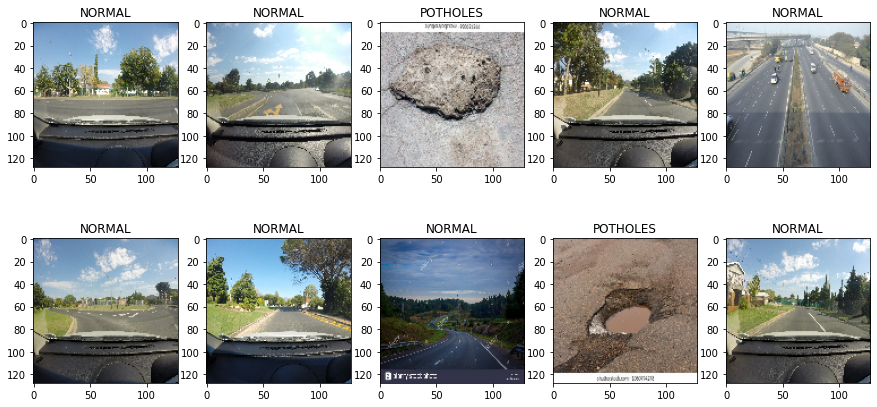

In [ ]:
import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range(5):
        l=rn.randint(0,len(y))
        print(imagepaths[l])
        ax[i,j].imshow(x[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# from sklearn.metrics import confusion_matrix

# from glob import glob


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)
print(Y)
x=np.array(x)
x=x/255

x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.25,random_state=5)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
training_history=model.fit(x_train, y_train, epochs= 35, batch_size=12, verbose=2,
         validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

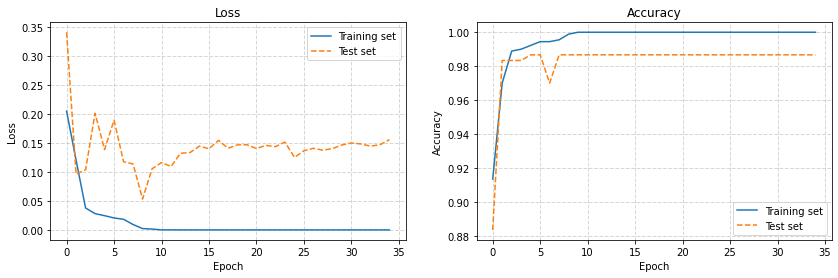

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()
render_training_history(training_history)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

10/10 [==============================] - 0s 19ms/step - loss: 0.1560 - accuracy: 0.9867
Test accuracy: 98.67%


In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
training_history=model.fit(x_train, y_train, epochs= 35, batch_size=12, verbose=2,
         validation_data=(x_test, y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 128)     

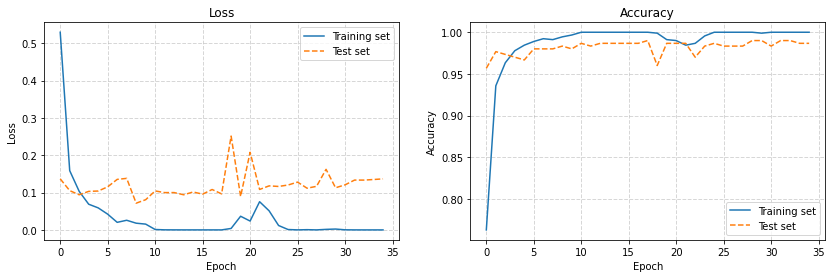

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()
render_training_history(training_history)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

10/10 [==============================] - 0s 11ms/step - loss: 0.1367 - accuracy: 0.9867
Test accuracy: 98.67%


In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
training_history=model.fit(x_train, y_train, epochs= 35, batch_size=12, verbose=2,
         validation_data=(x_test, y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 128)     

In [ ]:
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")

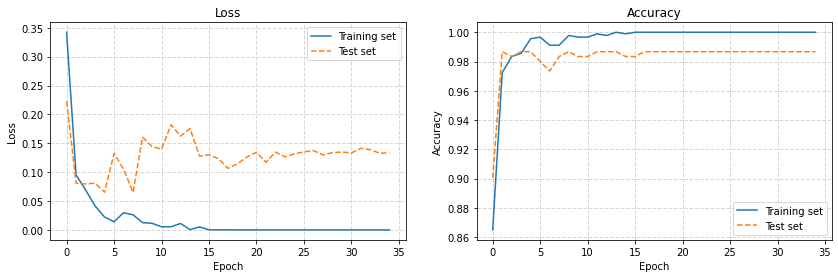

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()
render_training_history(training_history)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

10/10 [==============================] - 0s 14ms/step - loss: 0.1339 - accuracy: 0.9867
Test accuracy: 98.67%


Prediction Model

In [ ]:

model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 128)     

In [ ]:
model.load_weights('model.h5')

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 128)     

In [ ]:
from google.colab.patches import cv2_imshow
def load_image(img_path):

    img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)

    img_resize = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

    train_data = np.array(img_resize).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    train_data = train_data / 255.0


    return train_data


In [ ]:
from PIL import Image
def display(img_path):
  img=Image.open(img_path)
  return img

In [ ]:
def prediction(img_path):
    new_image = load_image(img_path)
    # print(new_image.shape)
    # print(new_image)
    pred = model.predict(new_image)
    labels = np.array(pred)
    if(labels[0][0]<labels[0][1]):
        print("Pothole")
        s = "Pothole"
    else:
        print("No Pothole")
        s = "Normal"
    img=display(img_path)
    return img

Saving road.png to road (2).png
Pothole


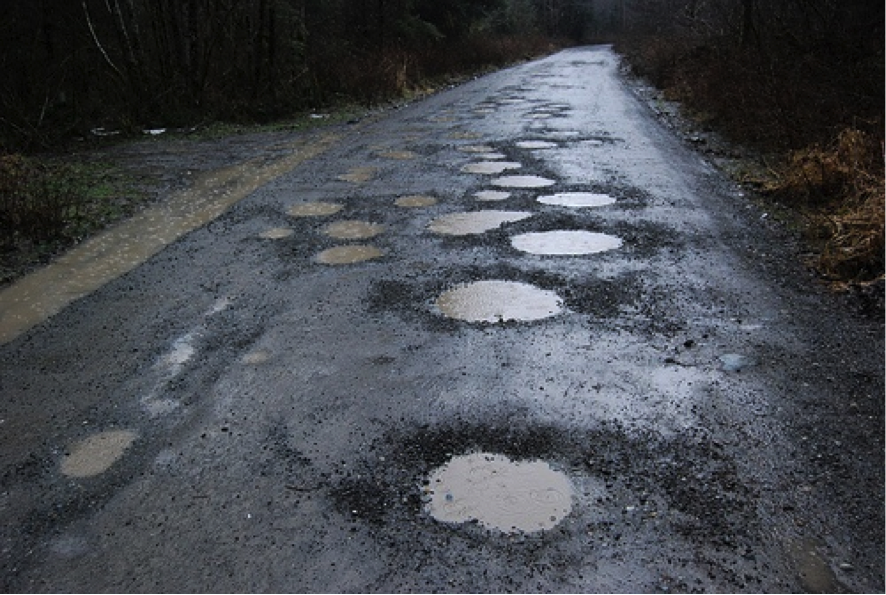

In [ ]:
img=files.upload()
image_path=list(img.keys())[0]
prediction(image_path)